In [53]:
try:
    import kagglehub
except ModuleNotFoundError:
    !pip install kagglehub
    import kagglehub
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns

In [3]:
# Download latest version
path = kagglehub.dataset_download("arashnic/book-recommendation-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/jovyan/.cache/kagglehub/datasets/arashnic/book-recommendation-dataset/versions/3


In [29]:
user_path = list(Path(path).glob("*User*.csv"))[0]
book_path = list(Path(path).glob("*Book*.csv"))[0]
rating_path = list(Path(path).glob("*Rating*.csv"))[0]
books_df = pd.read_csv(book_path,low_memory=False)
ratings_df = pd.read_csv(rating_path)
users_df = pd.read_csv(user_path)

In [30]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [31]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [32]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [35]:
user_rating_df = pd.merge(users_df,ratings_df,on="User-ID")
user_rating_df.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


In [103]:
print(f"(min, max) rating scale ({user_rating_df['Book-Rating'].min()}, {user_rating_df['Book-Rating'].max()})")
# rating scale is 0 - 10

(min, max) rating scale (0, 10)


In [104]:
mean_ratings = user_rating_df.groupby("User-ID")['Book-Rating'].mean()
mean_ratings[mean_ratings>5]

User-ID
12        10.000000
19         7.000000
26         9.500000
42         7.000000
51         9.000000
            ...    
278832    10.000000
278836     8.000000
278844     6.333333
278852     8.000000
278854     5.250000
Name: Book-Rating, Length: 45841, dtype: float64

In [105]:
user_rating_counts = user_rating_df.groupby("User-ID")['Book-Rating'].count()
print(f"(min, max) number of reviews ({user_rating_counts.min()}, {user_rating_counts.max()})")
print(sorted(user_rating_counts)[-20:])

(min, max) number of reviews (1, 13602)
[2421, 2448, 2459, 2504, 2507, 2512, 2529, 2674, 2948, 2991, 3067, 3100, 3367, 4533, 4785, 5850, 5891, 6109, 7550, 13602]


User-ID
11676    13602
Name: Book-Rating, dtype: int64


Text(0.5, 1.0, "User 11676 Most Reviews' Review Spread")

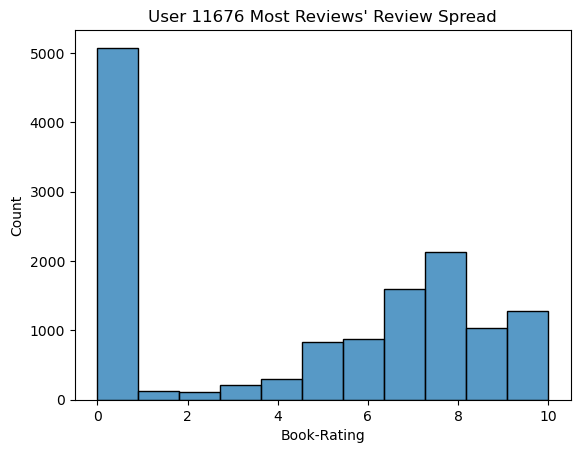

In [84]:
print(user_rating_counts[user_rating_counts == 13602])
# who is this person who rated 13602 books?! 
# it is double the last rating!
sorted(user_rating_counts)[-10:]
user_rating_df[user_rating_df['User-ID']==11676]['Book-Rating'].mean()
ax = sns.histplot(user_rating_df[user_rating_df['User-ID']==11676]['Book-Rating'],bins=11)
ax.set_title("User 11676 Most Reviews' Review Spread")
# well.. this user has 5000 0 rating reviews. 

Text(0.5, 1.0, "Histogram of Users' number of ratings")

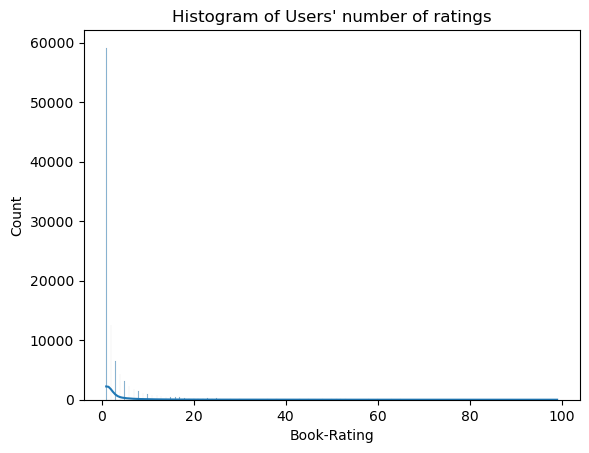

In [97]:
user_rating_counts = user_rating_df.groupby("User-ID")['Book-Rating'].count()
ax = sns.histplot(user_rating_counts[user_rating_counts<100],kde=True)
ax.set_title("Histogram of Users' number of ratings")

Text(0.5, 1.0, 'Histogram of mean book rating')

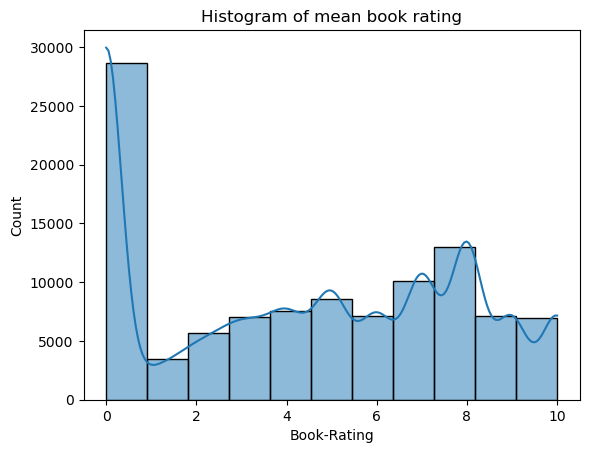

In [60]:
ax = sns.histplot(mean_ratings,bins=11,kde=True)
ax.set_title("Histogram of mean book rating")